# Gensim word vector visualization of various word vectors

In [2]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 49.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 3.7 MB/s eta 0:00:00


In [21]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

plt.rcParams["figure.figsize"] = (30,3)

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Для работы с эмбеддингами воспользуемся библотекой gensim.

Загрузим эмбединги языковой модели GLOVE [Glove](https://nlp.stanford.edu/projects/glove/). Они [этого zip файла](https://nlp.stanford.edu/data/glove.6B.zip)

In [18]:
# !wget https://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip

Archive:  glove.6B.zip
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [26]:
# https://radimrehurek.com/gensim/scripts/glove2word2vec.html
glove_file = 'glove.6B.300d.txt'

model = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)

In [27]:
model.most_similar('eminem')

[('rapper', 0.655975341796875),
 ('jay-z', 0.6106136441230774),
 ('rappers', 0.6008306741714478),
 ('snoop', 0.5985943078994751),
 ('dogg', 0.5973942875862122),
 ('rap', 0.5843311548233032),
 ('kanye', 0.5761501789093018),
 ('rihanna', 0.552341639995575),
 ('dre', 0.5444122552871704),
 ('t.i.', 0.5262868404388428)]

In [28]:
model.most_similar('nissan')

[('mazda', 0.6859744787216187),
 ('toyota', 0.6815260052680969),
 ('honda', 0.6580851078033447),
 ('automaker', 0.6342328190803528),
 ('mitsubishi', 0.6243486404418945),
 ('volkswagen', 0.591887891292572),
 ('isuzu', 0.5902670621871948),
 ('motors', 0.5901631712913513),
 ('altima', 0.5813596844673157),
 ('renault', 0.5758241415023804)]

In [29]:
model.most_similar(positive='banana')

[('bananas', 0.6691170930862427),
 ('mango', 0.5804103016853333),
 ('pineapple', 0.5492371916770935),
 ('coconut', 0.5462779402732849),
 ('papaya', 0.5410566926002502),
 ('fruit', 0.52181077003479),
 ('growers', 0.487763911485672),
 ('nut', 0.4839959740638733),
 ('peanut', 0.48062023520469666),
 ('potato', 0.48061180114746094)]

In [30]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.6713


In [31]:
def analogy(pos_1, pos_2, neg_1):
    "pos_1 + pos_2 - neg_1 = neg_2"
    result = model.most_similar(positive=[pos_1, pos_2], negative=[neg_1])
    return result[0][0]

In [45]:
analogy('king', 'woman', 'man')

'queen'

In [46]:
analogy('russia', 'paris', 'moscow')

'france'

In [50]:
analogy('russia', 'germany', 'moscow')

'austria'

In [51]:
analogy('paris', 'moscow', 'russia')

'prohertrib'

In [52]:
analogy('moscow', 'paris', 'france')

'kiev'

In [61]:
analogy('usa', 'euro', 'france')

'dollar'

![Analogy](word2vec-king-queen-composition.png)

In [62]:
analogy('japan', 'japanese', 'australia')

'tokyo'

In [63]:
analogy('moscow', 'russia', 'paris')

'russian'

In [64]:
analogy('france', 'champagne', 'russia')

'french'

In [65]:
analogy('dre', 'eminem', 'lenin')

'rapper'

In [66]:
analogy('tall', 'tallest', 'long')

'free-standing'

In [67]:
analogy('good', 'fantastic', 'bad')

'wonderful'

In [68]:
print(model.doesnt_match("dog cat cola fox".split()))

cola


In [69]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.key_to_index.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(10,10))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

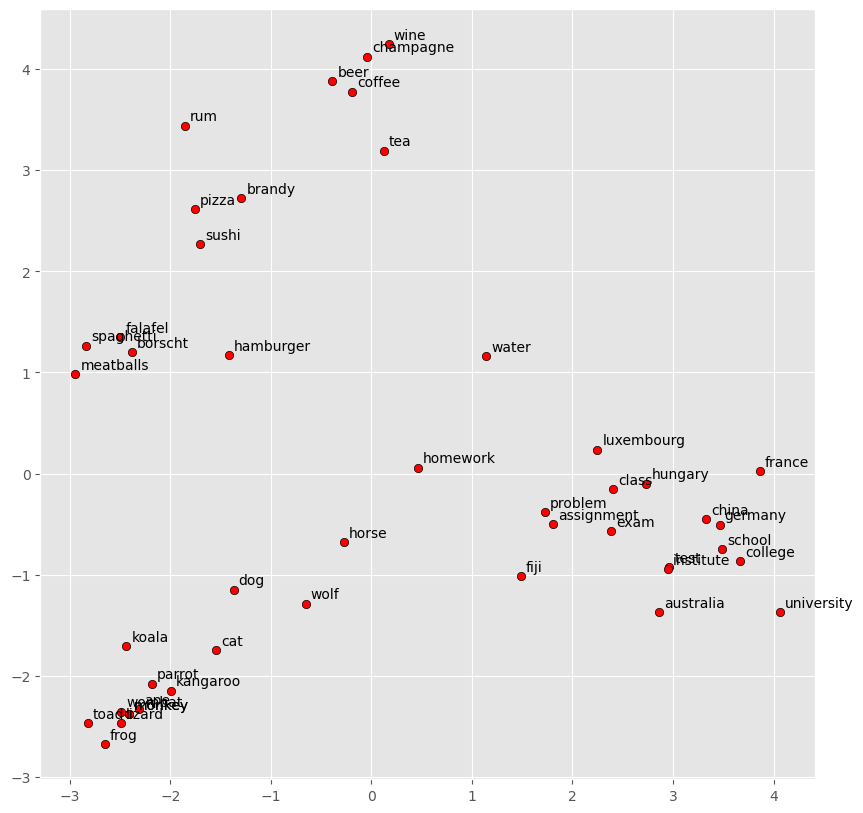

In [70]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

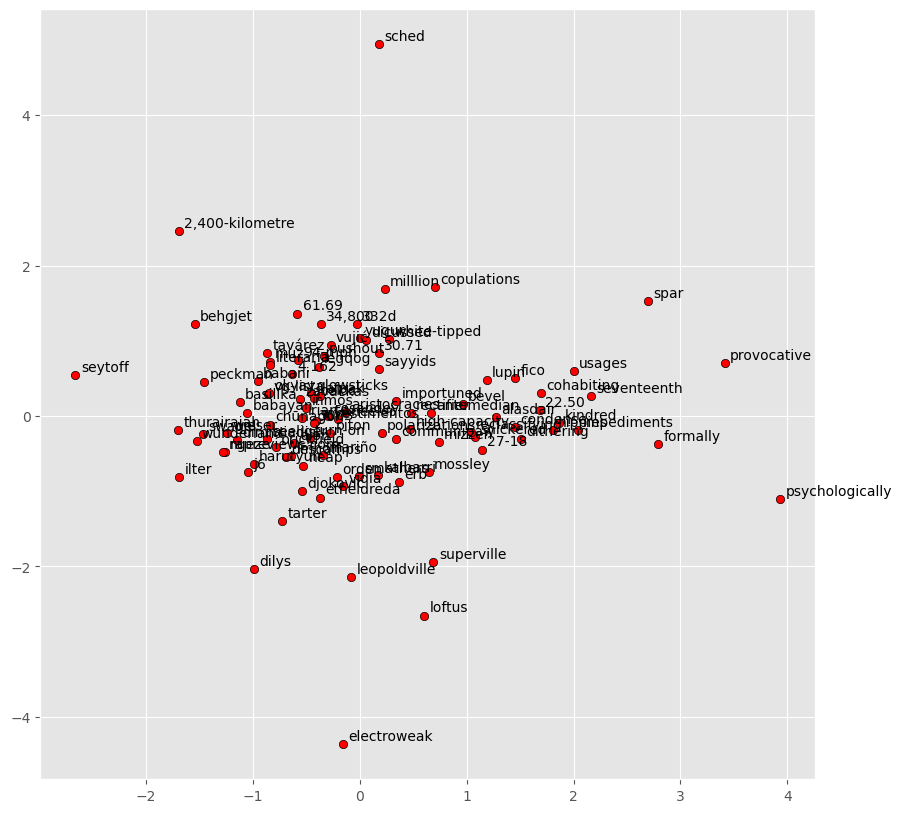

In [71]:
display_pca_scatterplot(model, sample=100)